# Census Income Project

# Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

# Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

#  Problem Definition:
The objective of the project is to predict whether a person makes over 50K a year given their demographic variations.

# Importing Neccessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
import xgboost 
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
df = pd.read_csv('census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Exploratory Data Analysis(EDA)

Firstly to understand about the dataset, we should know how much data is there in the dataset. 

In [3]:
# Checking the dimensions of this dataset.
df.shape

(32560, 15)

- There are 32650 rows and 15 columns.

In [4]:
# checkng the columns present in the dataset.
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

- In 15 columns, the headings seems to has no space & special characters.

In [5]:
# To confirm about the first prediction right, Cheching the datatypes of all the columns.
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

- Datasets has both integer & objects datatypes.

In [6]:
# For getting the overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- datasets has 6 integer columns & 9 objects columns.
- categorical column - Workclass, Education, Marital_status,Occupation, Relationship, Race,Sex, Native_country, Income
- Numerical_column - Age, Fnlwgt, Education_num,Capital_gain, Capital_loss, Hours_per_week

In [7]:
# checking the null values in the dataframe
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

- There is no null value.

In [8]:
#Checking the statistical Summary of the dataset
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


- Age ranges between 17 years to 90 years.
- Hours_per_week ranges between 1 hour to 99 hour.
- Education_num ranges between 1 to 16.

In [9]:
col =['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']
for i in col:
    print(f"{i}:")
    print(df[i].value_counts())
    print("\n")

Workclass:
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


Education:
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


Marital_status:
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


Occupation:
 Prof-specialt

- So we can see in columns Workclass,Occupation,Native_country,'?' is present and count of occurence is 1836,1843,583 respectively. 
- Male count(21789) is more than female count(10771). 
- Most of the people from United States and minimum people from Netherlands. 
- Most people are White. 
- Most of the Education is HS-grad. 

In [10]:
df['Workclass'].mode()[0]

' Private'

In [11]:
df['Occupation'].mode()[0]

' Prof-specialty'

In [12]:
df['Native_country'].mode()[0]

' United-States'

In [13]:
#We will replace all '?' with most frequently occuring values of that column because these are categorical columns
df['Workclass'] = df.Workclass.str.replace('?', 'Private')
df['Occupation'] = df.Occupation.str.replace('?', 'Prof-specialty')
df['Native_country'] = df.Native_country.str.replace('?', 'United-States')

In [14]:
#lets confirm the replacement is done or not.
col =['Workclass','Occupation','Native_country']
for i in col:
    print(f"{i}:")
    print(df[i].value_counts())
    print("\n")

Workclass:
 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


Occupation:
 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


Native_country:
 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba 

- Now we can see in columns Workclass,Occupation,Native_country,'?' is replaced.
- In Workclass, Private count was 22696, and now the count is 24532.
- In Occupation, Prof-specialty count was 4140, and now the count is 5983.
- In Native_country, United-States count was 29169, and now the count is 29752.

In [15]:
# let's check duplicate values
df.duplicated().sum()

24

- Dataframe has 24 Duplicate Values

In [16]:
# let's drop duplicate data

df.drop_duplicates()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


- There are 32536 rows and 15 columns.

In [17]:
# Since in Eduaction category there are 16 type of categories,so will reduce it in some meaningful category.
df['Education']=df.Education.replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'School',regex=True)
df['Education']=df.Education.replace(['Assoc-voc','Assoc-acdm','Prof-school','Some-college','Masters','Doctorate'],'higher_education',regex=True)
df['Education'] =df.Education.replace(['HS-grad','High School'],'High School',regex=True)

In [18]:
df['Education'].value_counts()

 higher_education    12452
 High School         10501
 Bachelors            5354
 School               4253
Name: Education, dtype: int64

In [19]:
# Since in Marital_status category there are 7 type of categories,so will reduce it in some meaningful category.
df['Marital_status'] =df['Marital_status'].replace(['Married-civ-spouse','Married-AF-spouse'],'Married',regex=True)
df['Marital_status'] =df['Marital_status'].replace(['Divorced','Separated','Widowed','Married-spouse-absent'],'Other',regex=True)
df['Marital_status'] =df['Marital_status'].replace('Never-married','Not-married',regex=True)

In [20]:
df['Marital_status'].value_counts()

 Married        14999
 Not-married    10682
 Other           6879
Name: Marital_status, dtype: int64

# Data Visualization

In [21]:
# Count of the Target Variable
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

- For Income Two values are present .One is <= 50k (24719 count),and other is > 50k (7841 count).

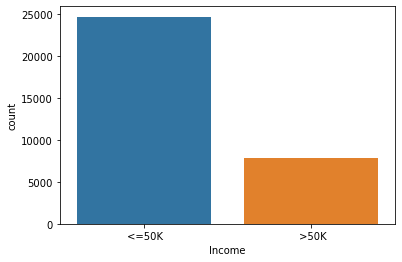

In [22]:
# Visualizing the Histogram of the Target Variable
sns.countplot(df['Income']);

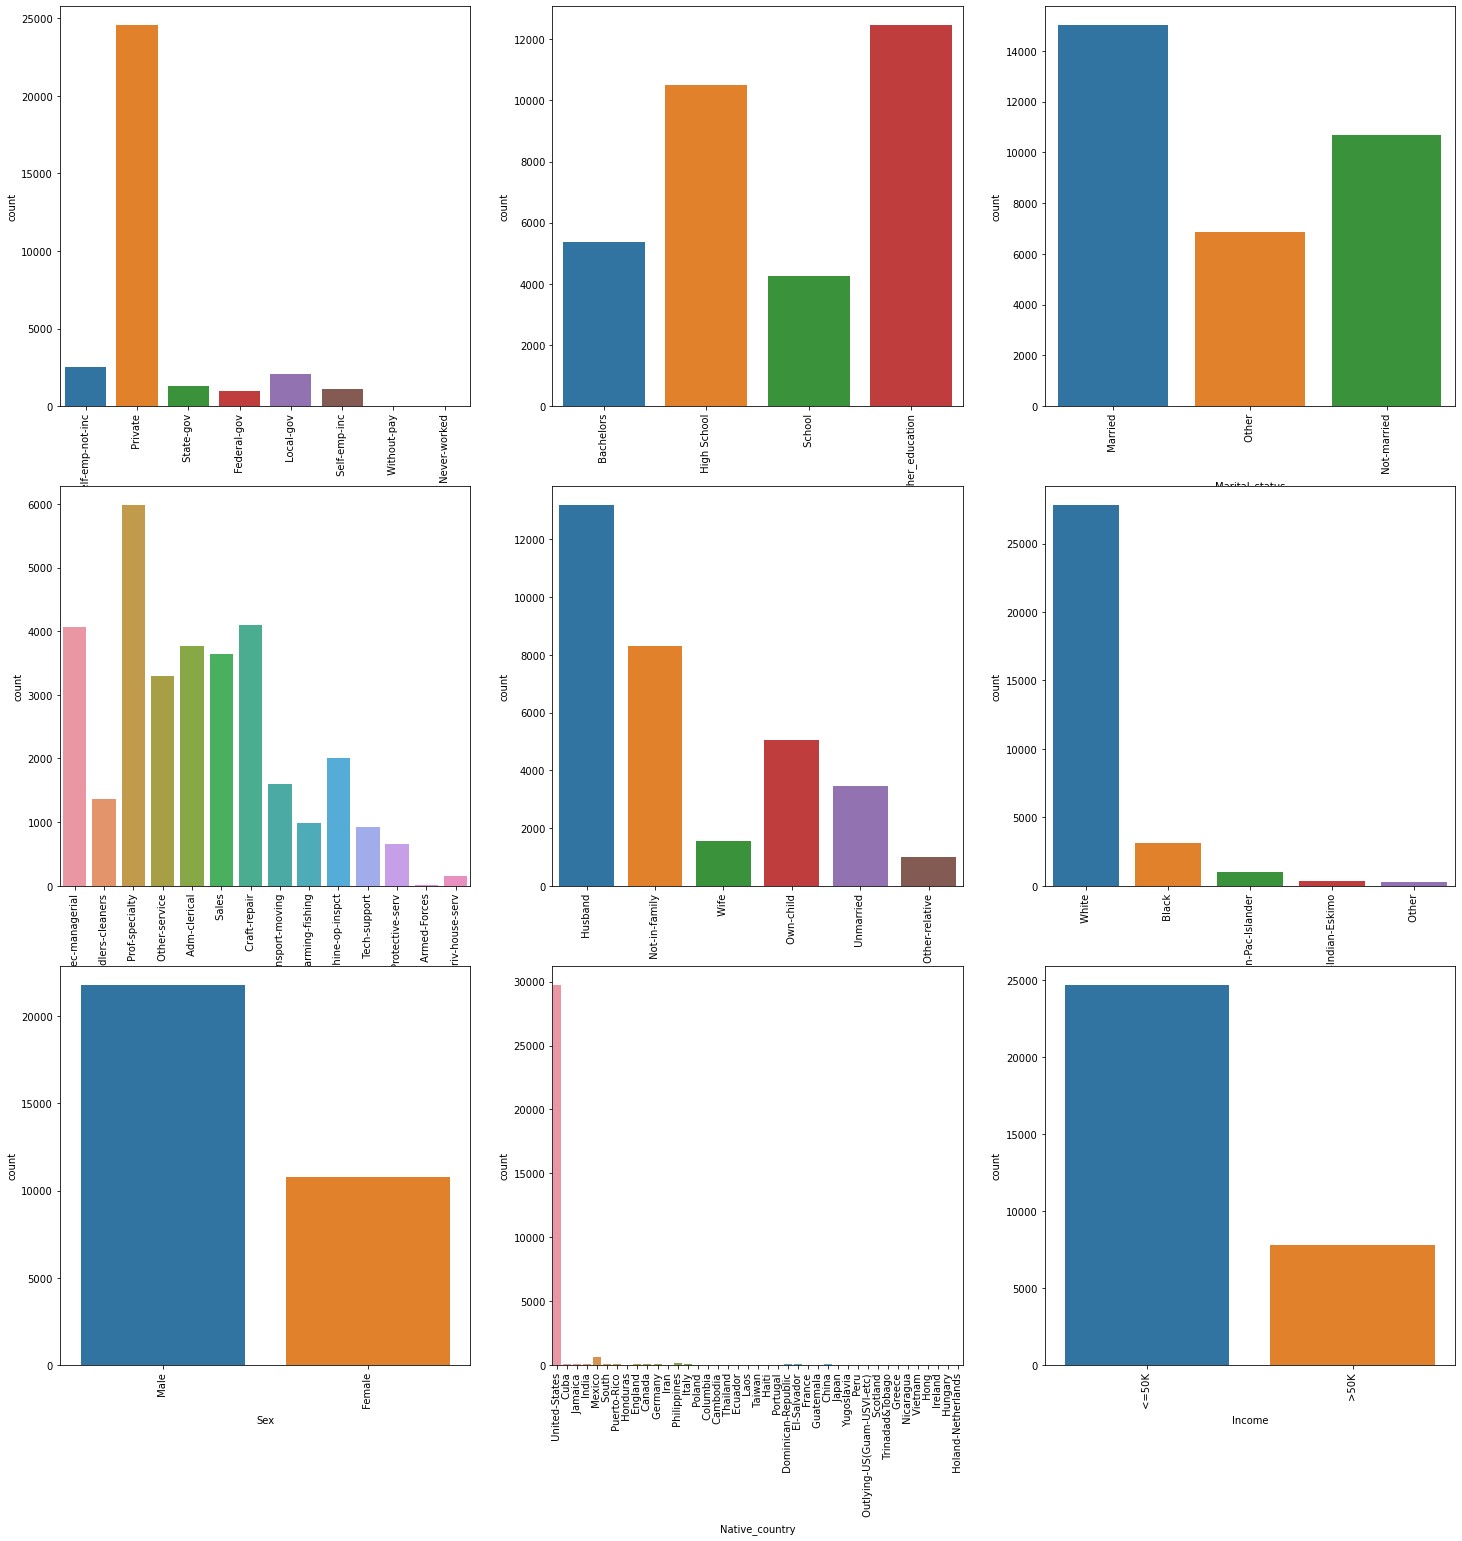

In [23]:
# check how the data is distributated in each coloumn
col =['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

plt.figure(figsize=(25,25))
plotnumber =1
for i in col:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i)
        plt.xticks(rotation=90)

        plotnumber +=1
plt.show() 

- Workclass count is more for Private. Income count is more for <50k

<AxesSubplot:xlabel='Income', ylabel='count'>

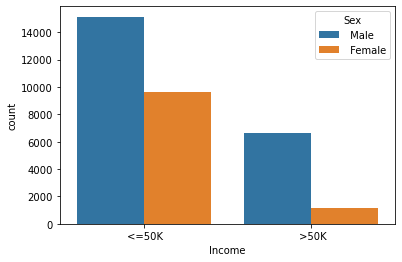

In [24]:
sns.countplot(df['Income'],hue='Sex',data=df)

- In both cases <=50k or >= 50k male count is more than female.

<AxesSubplot:xlabel='Income', ylabel='count'>

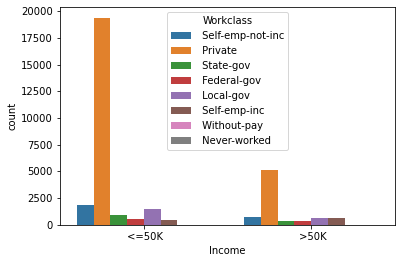

In [25]:
sns.countplot(df['Income'],hue='Workclass',data=df)

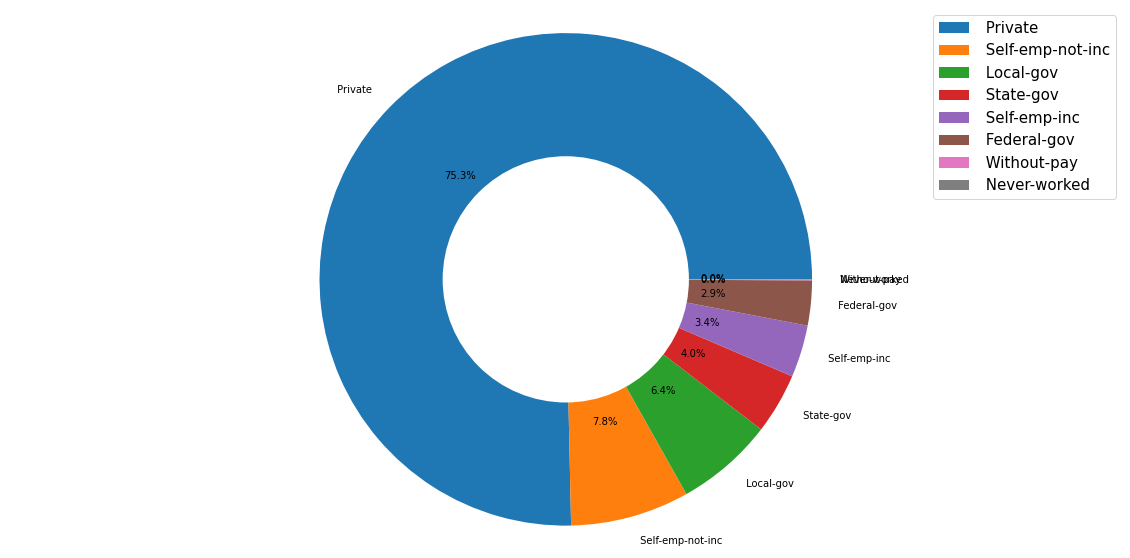

In [26]:
#Lets have a look on Workclass, how it is distributed
plt.figure(figsize=(20, 10))
plt.pie( df["Workclass"].value_counts().values, labels = df["Workclass"].value_counts().index, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

- 75.3% of Workclass contains entries named private

# Dividing Dataframe into numeric & object dataframe for easy EDA and Labelencoding.

In [27]:
numerics = ['float64', 'int64']
numeric = df.select_dtypes(include=numerics)
objects = df.select_dtypes(exclude=numerics)

In [28]:
objects.head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,High School,Other,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,School,Married,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,higher_education,Married,Exec-managerial,Wife,White,Female,United-States,<=50K


In [29]:
objects.describe()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,8,4,3,14,6,5,2,41,2
top,Private,higher_education,Married,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,24532,12452,14999,5983,13193,27815,21789,29752,24719


- Target Col has two class which is <=50k & >50k.
- Where the count of <=50k salary is highest which is 24719.
- Country Col has 41 class where Country United states freq is highest with count value of 29169.
- Similary kind of Obs Can be seen with remaining Objects variables.

# Labelencoder

In [30]:
# categorical variable encoding
cat_vars_list = objects.columns.tolist()
## Label Encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in cat_vars_list :
    df[i] = le.fit_transform(df[i])

In [31]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,0,13,0,3,0,4,1,0,0,13,38,0
1,38,3,215646,1,9,2,5,1,4,1,0,0,40,38,0
2,53,3,234721,2,7,0,5,0,2,1,0,0,40,38,0
3,28,3,338409,0,13,0,9,5,2,0,0,0,40,4,0
4,37,3,284582,3,14,0,3,5,4,0,0,0,40,38,0


- The dataframe shows encoded value for objects cols.

In [32]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

# Correlation Matrix:-

In [33]:
# checking the correlation of features and labels
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040506,-0.076646,-0.025305,0.036527,-0.080862,0.001740,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000271,0.234039
Workclass,0.040506,1.000000,-0.024255,0.011020,0.003445,-0.057515,0.007236,-0.057931,0.048323,0.071535,0.031496,0.002662,0.042206,-0.001646,0.002739
Fnlwgt,-0.076646,-0.024255,1.000000,-0.003707,-0.043159,0.011379,0.000138,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.063279,-0.009481
Education,-0.025305,0.011020,-0.003707,1.000000,-0.054137,0.034283,0.003469,0.046727,-0.001598,-0.040792,0.010967,0.000574,-0.048270,-0.008962,-0.019423
Education_num,0.036527,0.003445,-0.043159,-0.054137,1.000000,-0.090654,0.071012,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.088887,0.335182
Marital_status,-0.080862,-0.057515,0.011379,0.034283,-0.090654,1.000000,-0.032215,0.468589,-0.080179,-0.447080,-0.069578,-0.065873,-0.152753,-0.000247,-0.377016
Occupation,0.001740,0.007236,0.000138,0.003469,0.071012,-0.032215,1.000000,-0.037465,-0.004821,0.047497,0.018028,0.009670,-0.012881,-0.002205,0.034599
Relationship,-0.263698,-0.057931,0.008922,0.046727,-0.094145,0.468589,-0.037465,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.010710,-0.250924
Race,0.028718,0.048323,-0.021278,-0.001598,0.031825,-0.080179,-0.004821,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.116526,0.071853
Sex,0.088832,0.071535,0.026882,-0.040792,0.012256,-0.447080,0.047497,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.002055,0.215995


<AxesSubplot:>

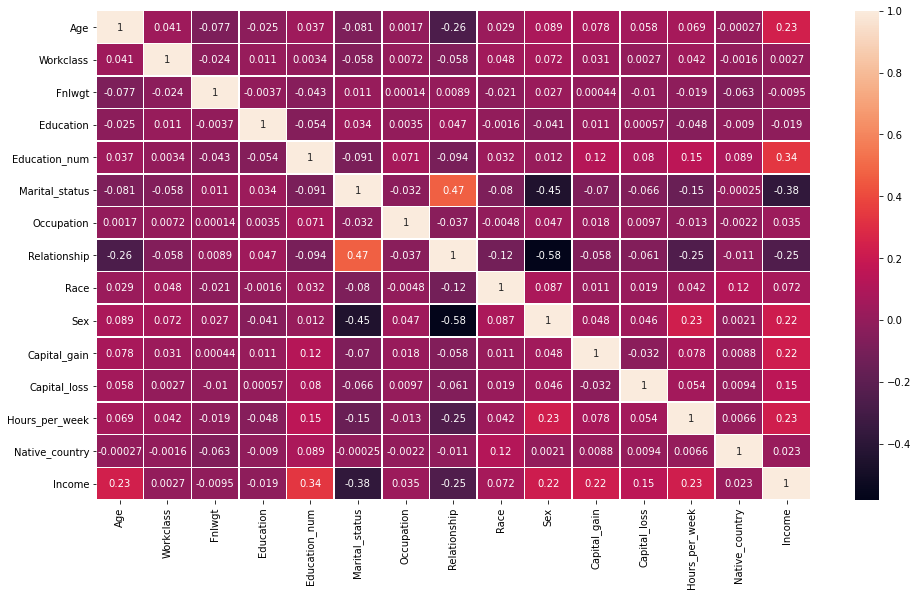

In [34]:
# Heat Map
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths=0.5,annot = True)

- Age shows -ve corr with relationship
- Age shows some corr with Target Col
- Target col-Income shows -ve corr with Relationship & Marital_status.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Workclass'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Marital_status'}>,
        <AxesSubplot:title={'center':'Occupation'}>,
        <AxesSubplot:title={'center':'Relationship'}>],
       [<AxesSubplot:title={'center':'Race'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>,
        <AxesSubplot:title={'center':'Capital_loss'}>],
       [<AxesSubplot:title={'center':'Hours_per_week'}>,
        <AxesSubplot:title={'center':'Native_country'}>,
        <AxesSubplot:title={'center':'Income'}>, <AxesSubplot:>]],
      dtype=object)

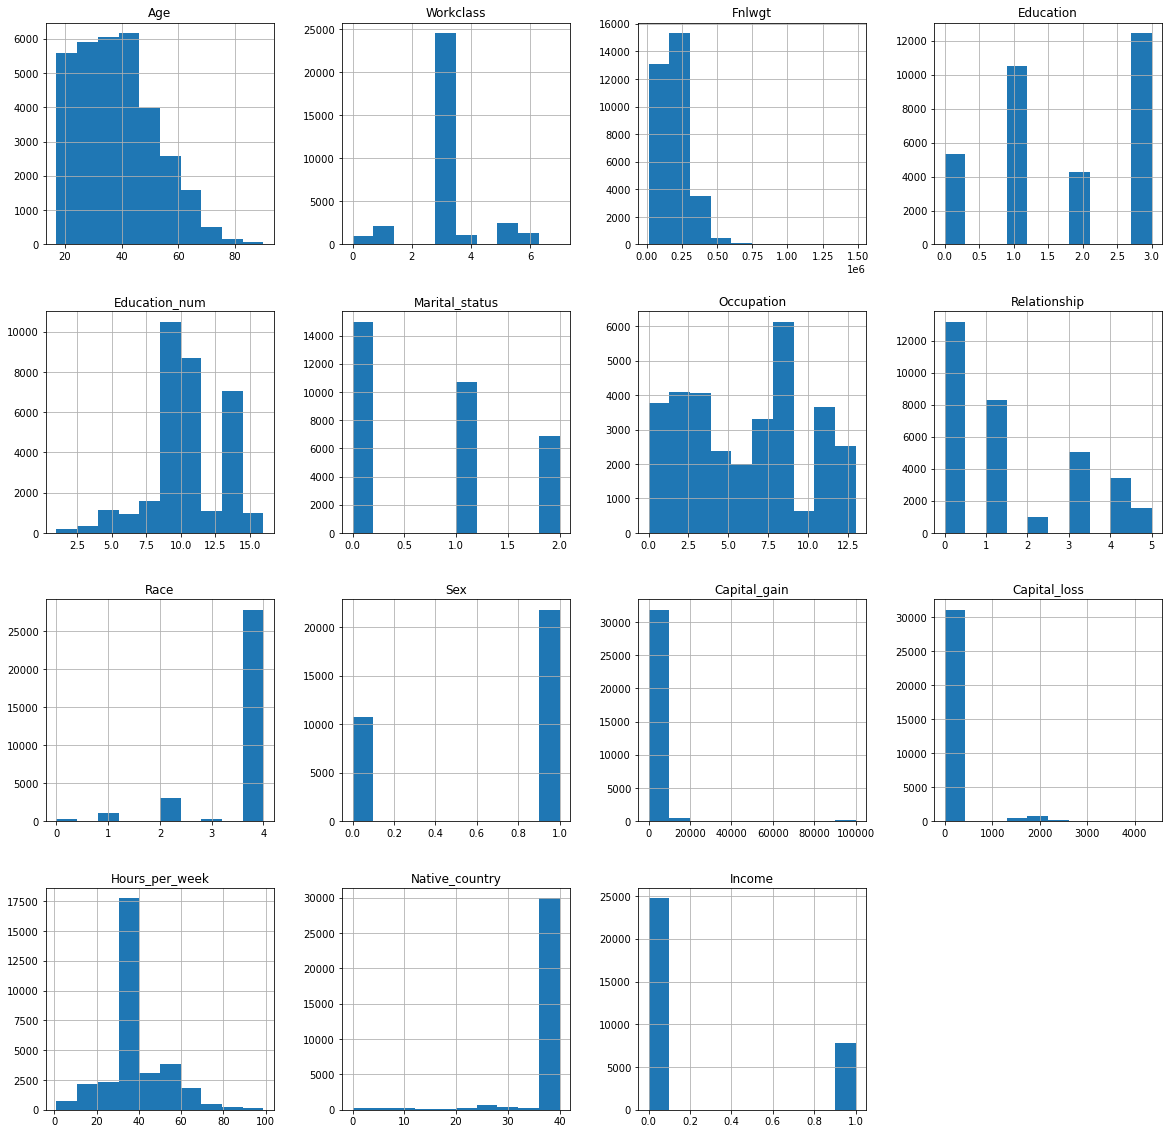

In [35]:
df.hist(figsize=(20,20))

# Outliers

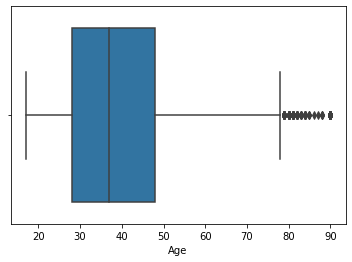

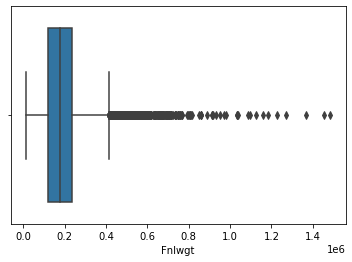

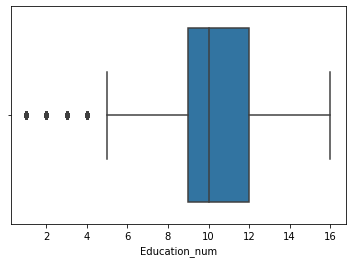

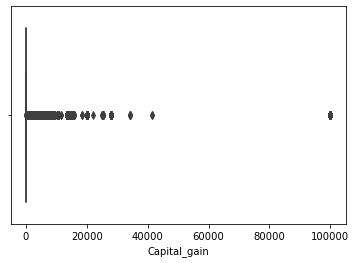

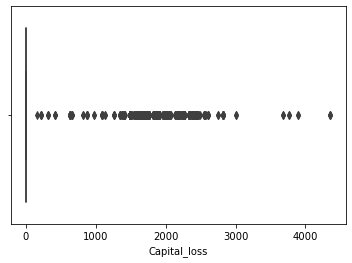

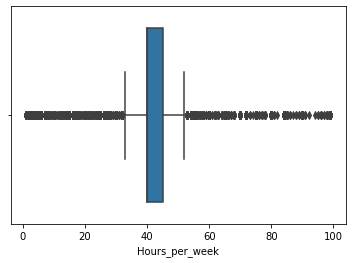

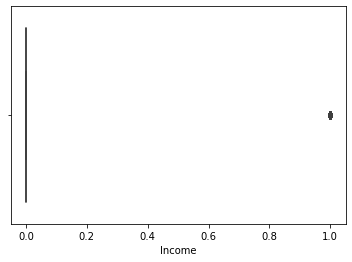

In [36]:
column = ['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week','Income']
for i in column:
    sns.boxplot(df[i])
    plt.show()

<AxesSubplot:>

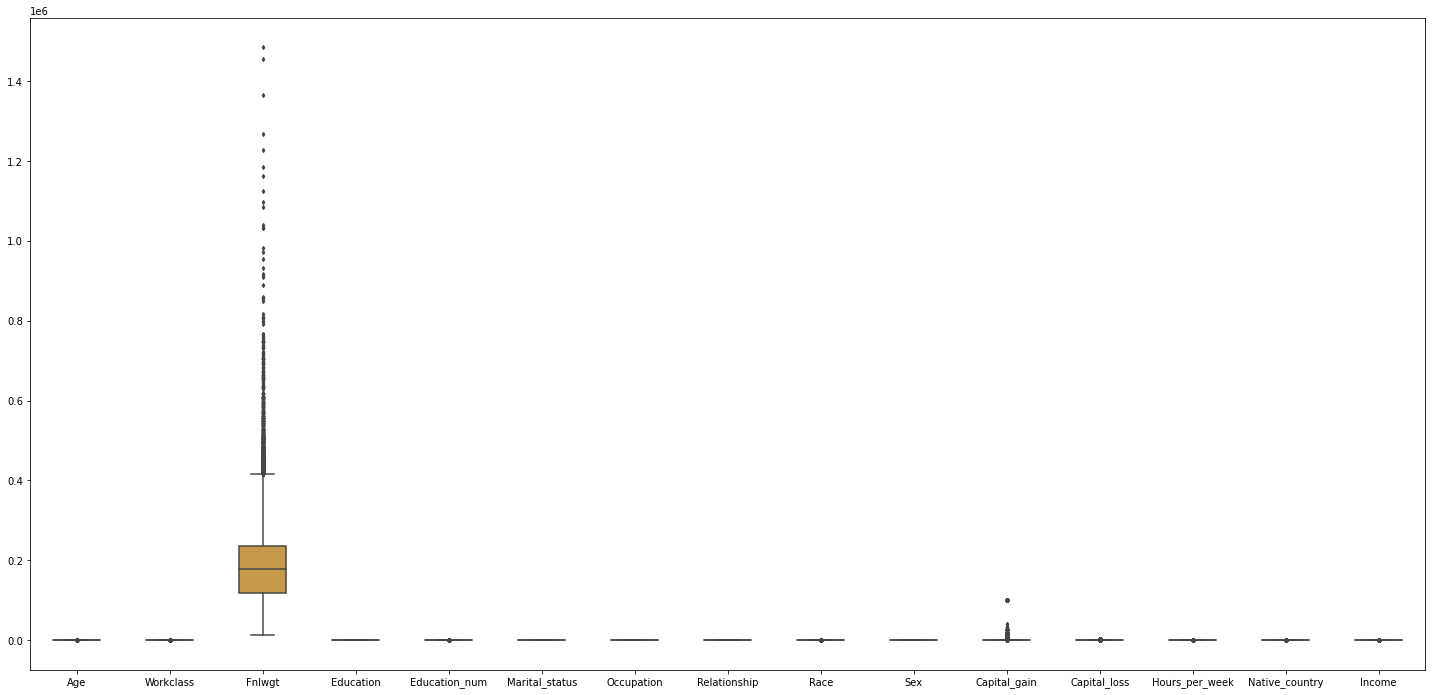

In [37]:
fig, ax =plt.subplots(figsize=(25,12))
sns.boxplot(data=df, width = 0.5,ax=ax, fliersize=3)

- Since Income is our target column and categorical column also,so will not remove outliers in Income.

# VIF : Multicollinearity Test :

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif["features"]=df.columns
    print(vif)

In [39]:
vif_calc()

    VIF Factor        features
0     9.052074             Age
1     8.451941       Workclass
2     4.028571          Fnlwgt
3     3.243447       Education
4    16.881049   Education_num
5     2.880752  Marital_status
6     3.357603      Occupation
7     2.939938    Relationship
8    17.879920            Race
9     4.709301             Sex
10    1.084126    Capital_gain
11    1.078855    Capital_loss
12   12.062687  Hours_per_week
13   28.227621  Native_country
14    1.900175          Income


# Z score

In [40]:
from scipy.stats import zscore
columns=df[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']]
z=np.abs(zscore(columns))

new_df = df[(z<3).all(axis=1)]
new_df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,0,13,0,3,0,4,1,0,0,13,38,0
1,38,3,215646,1,9,2,5,1,4,1,0,0,40,38,0
2,53,3,234721,2,7,0,5,0,2,1,0,0,40,38,0
3,28,3,338409,0,13,0,9,5,2,0,0,0,40,4,0
4,37,3,284582,3,14,0,3,5,4,0,0,0,40,38,0


In [41]:
print(df.shape)
print(new_df.shape)

(32560, 15)
(29827, 15)


In [42]:
data_loss=((32560-29827)/32560)*100
data_loss

8.393734643734643

# Skewness Detection:

In [43]:
new_df.skew()

Age                0.491112
Workclass          0.092296
Fnlwgt             0.634168
Education         -0.120265
Education_num     -0.170298
Marital_status     0.437169
Occupation         0.005826
Relationship       0.743825
Race              -2.436068
Sex               -0.680003
Capital_gain       4.943642
Capital_loss      29.661241
Hours_per_week    -0.354170
Native_country    -4.335169
Income             1.330372
dtype: float64

Fnlwgt,Capital_gain,Capital_loss are not in range of +/- 0.5.

In [44]:
from sklearn.preprocessing import PowerTransformer
skewed_features = ["Fnlwgt","Capital_gain","Capital_loss"]
scaler = PowerTransformer(method='yeo-johnson')

In [45]:
new_df[skewed_features] = scaler.fit_transform(new_df[skewed_features].values)
new_df[skewed_features].head()

,Fnlwgt,Capital_gain,Capital_loss
0,-1.113967,-0.296683,-0.040148
1,0.425203,-0.296683,-0.040148
2,0.605108,-0.296683,-0.040148
3,1.484491,-0.296683,-0.040148
4,1.046225,-0.296683,-0.040148


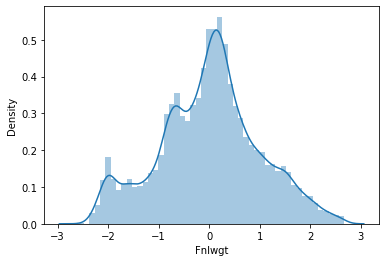

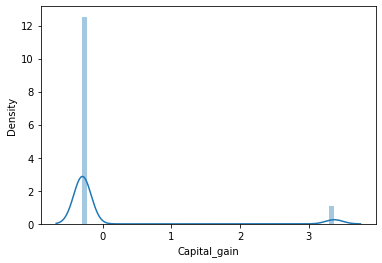

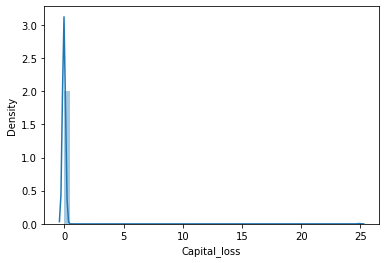

In [46]:
## Let us plot distribution plot to see distribution in columns after removing skewness:
columns = new_df[['Fnlwgt','Capital_gain','Capital_loss']]
for i in columns:
    sns.distplot(new_df[i])
    plt.show()

Data is not normally distributed,but we already removed skewness.So now will prepare our dataset for Training

In [47]:
new_df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,-1.113967,0,13,0,3,0,4,1,-0.296683,-0.040148,13,38,0
1,38,3,0.425203,1,9,2,5,1,4,1,-0.296683,-0.040148,40,38,0
2,53,3,0.605108,2,7,0,5,0,2,1,-0.296683,-0.040148,40,38,0
3,28,3,1.484491,0,13,0,9,5,2,0,-0.296683,-0.040148,40,4,0
4,37,3,1.046225,3,14,0,3,5,4,0,-0.296683,-0.040148,40,38,0


In [48]:
new_df.shape

(29827, 15)

# Dividing Dataset into Independent Variables(x) & Target Variable(y)

In [49]:
x = new_df.drop('Income',axis=1)
y = new_df['Income']

- x-Independent Variables.
- y-Target Variable(Income)

In [50]:
x.shape, y.shape

((29827, 14), (29827,))

In [51]:
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,5,-1.113967,0,13,0,3,0,4,1,-0.296683,-0.040148,13,38
1,38,3,0.425203,1,9,2,5,1,4,1,-0.296683,-0.040148,40,38
2,53,3,0.605108,2,7,0,5,0,2,1,-0.296683,-0.040148,40,38
3,28,3,1.484491,0,13,0,9,5,2,0,-0.296683,-0.040148,40,4
4,37,3,1.046225,3,14,0,3,5,4,0,-0.296683,-0.040148,40,38


In [52]:
y.value_counts()

0    23173
1     6654
Name: Income, dtype: int64

# Class Imbalance : Upsampling Target Col

In [53]:
from sklearn.utils import resample
# Concatenate our training data back together
x = pd.concat([x, y], axis=1)
grtr = x[x.Income==0]
less = x[x.Income==1]

In [54]:
# upsample minority
dia_upsampled = resample(less,
                          replace=True, # sample with replacement
                          n_samples=len(grtr),   # match number in majority
                          random_state=27)  # reproducible results

In [55]:
#concating both class
upsampled = pd.concat([grtr, dia_upsampled])

upsampled.Income.value_counts()

0    23173
1    23173
Name: Income, dtype: int64

In [56]:
upsampled.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,-1.113967,0,13,0,3,0,4,1,-0.296683,-0.040148,13,38,0
1,38,3,0.425203,1,9,2,5,1,4,1,-0.296683,-0.040148,40,38,0
2,53,3,0.605108,2,7,0,5,0,2,1,-0.296683,-0.040148,40,38,0
3,28,3,1.484491,0,13,0,9,5,2,0,-0.296683,-0.040148,40,4,0
4,37,3,1.046225,3,14,0,3,5,4,0,-0.296683,-0.040148,40,38,0


In [57]:
x=upsampled.drop("Income",axis=1)
y=upsampled["Income"]

In [58]:
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,5,-1.113967,0,13,0,3,0,4,1,-0.296683,-0.040148,13,38
1,38,3,0.425203,1,9,2,5,1,4,1,-0.296683,-0.040148,40,38
2,53,3,0.605108,2,7,0,5,0,2,1,-0.296683,-0.040148,40,38
3,28,3,1.484491,0,13,0,9,5,2,0,-0.296683,-0.040148,40,4
4,37,3,1.046225,3,14,0,3,5,4,0,-0.296683,-0.040148,40,38


In [59]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Income, dtype: int32

In [60]:
x.shape, y.shape

((46346, 14), (46346,))

# Scaling

In [61]:
scaling = StandardScaler()
x=scaling.fit_transform(x)
x

array([[ 0.76310534,  1.65248638, -1.12289454, ..., -0.03415418,
        -2.65222337,  0.24444397],
       [-0.18264274, -0.07209639,  0.43122136, ..., -0.03415418,
        -0.15035121,  0.24444397],
       [ 0.99954236, -0.07209639,  0.61287336, ..., -0.03415418,
        -0.15035121,  0.24444397],
       ...,
       [ 1.39360407, -1.79667915, -0.28802216, ..., -0.03415418,
        -0.15035121,  0.24444397],
       [ 0.684293  , -0.07209639,  0.52549755, ..., -0.03415418,
         0.31295845,  0.24444397],
       [-0.1038304 , -0.07209639,  1.46028165, ..., -0.03415418,
         0.31295845,  0.24444397]])

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is  ",maxAccu," on Random_state ",maxRS)

Best accuracy is   0.932825086306099  on Random_state  89


- best random sate out of 200 random state which is 89 with accuracy of 93.28%.

# Train Test Split

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=89)

- independent(x) & Target Variable(y) is divided into Train & Test Set.
- 70% data is set for training & 30% data is reserved for testing.

In [72]:
x_train.shape,y_train.shape

((32442, 14), (32442,))

In [74]:
x_test.shape,y_test.shape

((13904, 14), (13904,))

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve

# KNeighborsClassifier

In [76]:
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)
predknc = knc.predict(x_test)

print(accuracy_score(y_test, predknc))
print(confusion_matrix(y_test, predknc))
print(classification_report(y_test,predknc))

0.8375287686996548
[[5310 1627]
 [ 632 6335]]
              precision    recall  f1-score   support

           0       0.89      0.77      0.82      6937
           1       0.80      0.91      0.85      6967

    accuracy                           0.84     13904
   macro avg       0.84      0.84      0.84     13904
weighted avg       0.84      0.84      0.84     13904



Text(0.5, 1.0, 'Confusion Matrix for KNeighbors Classifier')

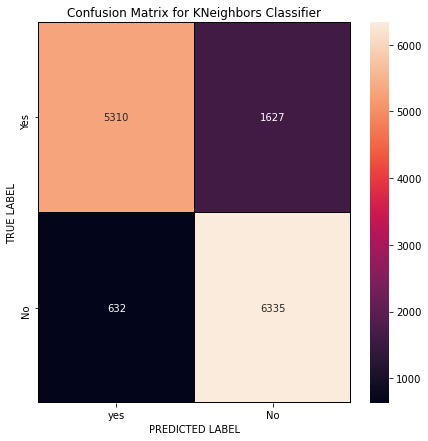

In [77]:
cm = confusion_matrix(y_test,predknc)

x_axis_labels = ["yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,  
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNeighbors Classifier')

True Positive-5310,True Negative-6335,False Positive-1627,False Negative-632.

# Support Vector Machine Classifier

In [79]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.8273878020713463
[[5231 1706]
 [ 694 6273]]
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      6937
           1       0.79      0.90      0.84      6967

    accuracy                           0.83     13904
   macro avg       0.83      0.83      0.83     13904
weighted avg       0.83      0.83      0.83     13904



Text(0.5, 1.0, 'Confusion Matrix for Support Vector Machine Classifier')

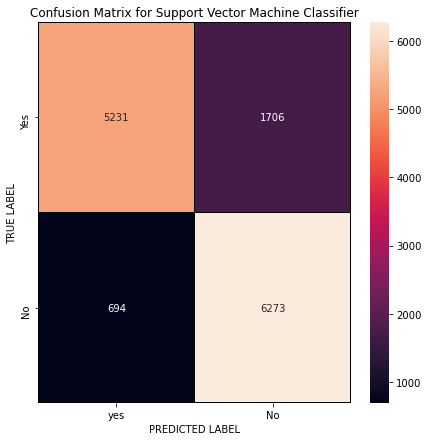

In [80]:
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,  
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')

True Positive-5231,True Negative-6273,False Positive-1706,False Negative-694.

# DecisionTreeClassifier

In [81]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc = dtc.predict(x_test)

print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test,preddtc))

0.9155638665132336
[[5974  963]
 [ 211 6756]]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      6937
           1       0.88      0.97      0.92      6967

    accuracy                           0.92     13904
   macro avg       0.92      0.92      0.92     13904
weighted avg       0.92      0.92      0.92     13904



Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

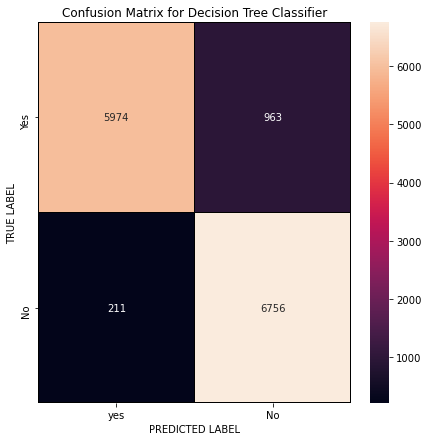

In [82]:
cm = confusion_matrix(y_test,preddtc)

x_axis_labels = ["yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,  
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')

True Positive-5974,True Negative-6756,False Positive-963,False Negative-211.

# RandomForestClassifier

In [83]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)

print(accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test,predrfc))

0.9305955120828538
[[6127  810]
 [ 155 6812]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      6937
           1       0.89      0.98      0.93      6967

    accuracy                           0.93     13904
   macro avg       0.93      0.93      0.93     13904
weighted avg       0.93      0.93      0.93     13904



Text(0.5, 1.0, 'Confusion Matrix for RandomForest Classifier')

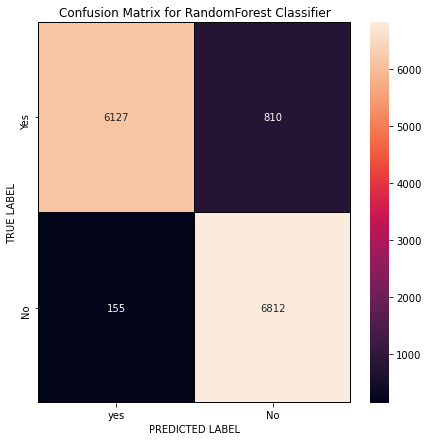

In [84]:
cm = confusion_matrix(y_test,predrfc)

x_axis_labels = ["yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,  
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForest Classifier')

True Positive-6127,True Negative-6812,False Positive-810,False Negative-155.

# LogisticRegression

In [85]:
lgr = LogisticRegression()
lgr.fit(x_train,y_train)
predlgr = lgr.predict(x_test)

print(accuracy_score(y_test, predlgr))
print(confusion_matrix(y_test, predlgr))
print(classification_report(y_test,predlgr))

0.8045886075949367
[[5419 1518]
 [1199 5768]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      6937
           1       0.79      0.83      0.81      6967

    accuracy                           0.80     13904
   macro avg       0.81      0.80      0.80     13904
weighted avg       0.81      0.80      0.80     13904



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regresson Classifier')

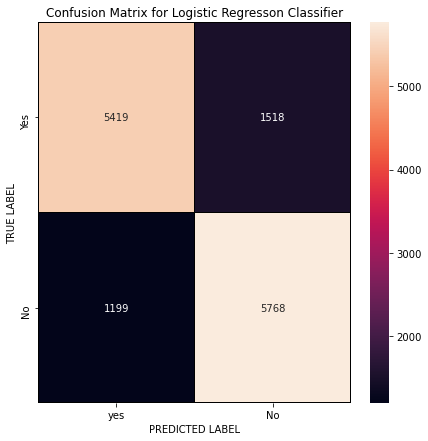

In [86]:
cm = confusion_matrix(y_test,predlgr)

x_axis_labels = ["yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,  
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regresson Classifier')

True Positive-5419,True Negative-5768,False Positive-1518,False Negative-1199.

# Cross Validation

In [88]:
from sklearn.model_selection import ShuffleSplit
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=maxRS)
cvs = cross_val_score(lgr, x, y, cv=cv)
print("Cross Validation of LogisticRegression model ",cvs.mean())

Cross Validation of LogisticRegression model  0.7973820483314153


In [90]:
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=maxRS)
cvs = cross_val_score(knc, x, y, cv=cv)
print("Cross Validation of KNeighbors Classifier model ",cvs.mean())

Cross Validation of KNeighbors Classifier model  0.8333573072497122


In [91]:
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=maxRS)
cvs = cross_val_score(dtc, x, y, cv=cv)
print("Cross Validation of DecisionTree Classifier model ",cvs.mean())

Cross Validation of DecisionTree Classifier model  0.9116369390103568


In [93]:
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=maxRS)
cvs = cross_val_score(svc, x, y, cv=cv)
print("Cross Validation of Support Vector Machine Classifier model ",cvs.mean())

Cross Validation of Support Vector Machine Classifier model  0.8206703107019562


In [94]:
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=maxRS)
cvs = cross_val_score(rfc, x, y, cv=cv)
print("Cross Validation of Random Forest Classifier model ",cvs.mean())

Cross Validation of Random Forest Classifier model  0.9272871116225545


Cross Validation score is maximum for Random Forest Classifier.

# Hyperparameter & GridsearchCV

In [102]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = maxRS,test_size = 0.30)
rfc = RandomForestClassifier()
parameters={'n_estimators' : [100,200],
            'criterion':['gini','entropy'],
            'max_depth':range(2,10),
            'max_features':["auto","sqrt","log2"],
            }

In [103]:
gridsearch=GridSearchCV(rfc,parameters)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 200}

In [99]:
rfc = RandomForestClassifier(criterion='gini',n_estimators=100,max_features='sqrt',max_depth=9)
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
score = accuracy_score(y_test,predrfc)
print("Accuracy Score :",score*100)
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test,predrfc))

Accuracy Score : 84.01179516685846
[[5464 1506]
 [ 717 6217]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      6970
           1       0.80      0.90      0.85      6934

    accuracy                           0.84     13904
   macro avg       0.84      0.84      0.84     13904
weighted avg       0.84      0.84      0.84     13904



# Plotting roc_auc_curve

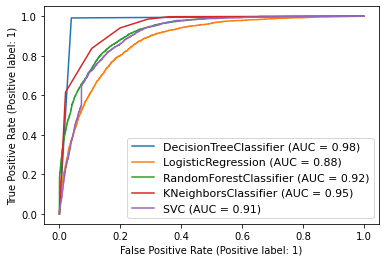

In [100]:
disp =plot_roc_curve(dtc,x_test,y_test)   
plot_roc_curve(lgr,x_test,y_test,ax = disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax = disp.ax_)
plot_roc_curve(knc,x_test,y_test,ax = disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax = disp.ax_)

plt.legend(prop={'size': 11},loc = 'lower right')
plt.show()

Area under curve is 92% for Random Forest.

# Exporting Model with Joblib Library

In [105]:
# Model is exported as .pkl file with the help of joblib library.
import pickle
filename ='Census_Income_prediction.pickle'
pickle.dump(rfc,open(filename,'wb'))